# Student Name: Yuan-Yao Lou
# ECE 595 Machine Learning II
# Project 2: Autoencoders - Student Code

---

\\

In [1]:
# Import necessary packages
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras import backend as K

Using TensorFlow backend.


# Part 0: Importing and Normalizing Data

In [2]:
# Load MNIST data and normalize to [0,1]
(data_train, _), (data_test, _) = mnist.load_data()
data_train = data_train / 255.0
data_test  = data_test  / 255.0

11501568/11490434 [==============================] - 0s 0us/step


# Part 1: Deep Fully-Connected AutoEncoder

Answer the following questions: 


1.  We want to predict output values of the intensity of the pixels which are between 0 to 1. Therefore choice of output layer activation function is important. (Open ended reasoning question).

  (a) Choose 'softmax’ or ‘sigmoid’. Reason why one is preferred over the other.

  ANS: Since our goal is to reconstruct output values representing the intensity of the pixels (regression task) instead of doing classification, I prefer 'sigmoid'. Because the probabilities produced by 'sigmoid' are independent and are not constrained to sum to 1, on the other hand, the outputs of 'softmax' are all interrelated, and the sum of the produced probabilities produced will always be 1.

In [5]:
# Reshape training and testing data into 784-dimensional vectors
data_train = data_train.reshape(60000, 784)
data_test  = data_test.reshape( 10000, 784)

In [ ]:
# Create autoencoder architecture
def deep_ae():
    model = Sequential()

    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform', input_dim=784))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(100, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform'))

    model.add(Dense(784, activation='sigmoid', use_bias=True))

    return model


# Create deep autoencoder graph
deep_ae = deep_ae()

# Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and assign training meta-data to a variable
meta_data_MSE = deep_ae.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )

# Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstruct_MSE = deep_ae.predict(data_test)

# Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) # The third hidden layer is indexed at 2
deep_ae_hl_MSE = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.1381 - val_loss: 0.0776
Epoch 2/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0739 - val_loss: 0.0721
Epoch 3/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0696 - val_loss: 0.0666
Epoch 4/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0646 - val_loss: 0.0618
Epoch 5/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0599 - val_loss: 0.0579
Epoch 6/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0564 - val_loss: 0.0538
Epoch 7/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0523 - val_loss: 0.0499
Epoch 8/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0478 - val_loss: 0.0439
Epoch 9/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0419 - val_loss: 0.0

In [ ]:
# Create autoencoder architecture
def deep_ae():
    model = Sequential()

    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform', input_dim=784))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(100, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform'))

    model.add(Dense(784, activation='sigmoid', use_bias=True))

    return model


# Create deep autoencoder graph
deep_ae = deep_ae()

# Compile model using an appropriate loss and optimizer algorithm
deep_ae.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model and assign training meta-data to a variable
meta_data_BCE = deep_ae.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )

# Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstruct_BCE = deep_ae.predict(data_test)

# Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output]) # The third hidden layer is indexed at 2
deep_ae_hl_BCE = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.4527 - val_loss: 0.2775
Epoch 2/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.2672 - val_loss: 0.2607
Epoch 3/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2581 - val_loss: 0.2549
Epoch 4/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.2532 - val_loss: 0.2504
Epoch 5/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.2475 - val_loss: 0.2415
Epoch 6/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.2377 - val_loss: 0.2326
Epoch 7/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.2266 - val_loss: 0.2141
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2049 - val_loss: 0.1951
Epoch 9/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.1900 - val_loss: 0.1

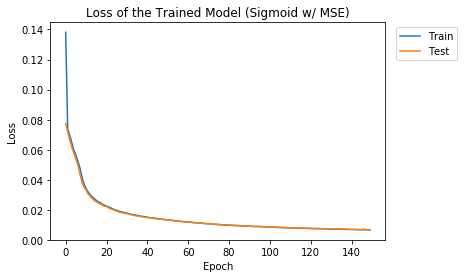

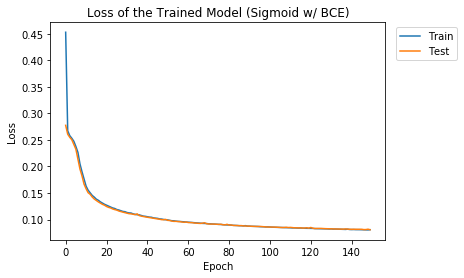

In [ ]:
# Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]

plt.figure()
plt.plot(meta_data_MSE.history['loss'])
plt.plot(meta_data_MSE.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

plt.figure()
plt.plot(meta_data_BCE.history['loss'])
plt.plot(meta_data_BCE.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ BCE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [6]:
# ==============================================================================
#   For Bunus: Pairs of the output layer activation and loss function          =
# ==============================================================================

# Create autoencoder architecture
def deep_ae_bonus(output_f):
    model = Sequential()

    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform', input_dim=784))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(100, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(200, activation='relu', use_bias=True, kernel_initializer='uniform'))
    model.add(Dense(400, activation='relu', use_bias=True, kernel_initializer='uniform'))

    model.add(Dense(784, activation=output_f, use_bias=True))

    return model

In [7]:
# ==============================================================================
#   For Bunus: Pairs of the output layer activation and loss function          =
# ==============================================================================

# Linear w/ BCE
print('\nModel with "Linear" as output activation and "BCE" as loss function\n-----\n')
deep_ae_1 = deep_ae_bonus('linear')
deep_ae_1.compile(loss='binary_crossentropy', optimizer='adam')
meta_data_1 = deep_ae_1.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )


Model with "Linear" as output activation and "BCE" as loss function
-----

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.5287 - val_loss: 0.3605
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3537 - val_loss: 0.3503
Epoch 3/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3494 - val_loss: 0.3489
Epoch 4/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3484 - val_loss: 0.3482
Epoch 5/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3467 - val_loss: 0.3431
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3382 - val_loss: 0.3356
Epoch 7/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3343 - val_loss: 0.3330
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.3269 - val_loss: 0.3245
Epoch 9/150
60000/60000 [=

In [8]:
# ==============================================================================
#   For Bunus: Pairs of the output layer activation and loss function          =
# ==============================================================================

# Linear w/ MSE
print('\nModel with "Linear" as output activation and "MSE" as loss function\n-----\n')
deep_ae_2 = deep_ae_bonus('linear')
deep_ae_2.compile(loss='mean_squared_error', optimizer='adam')
meta_data_2 = deep_ae_2.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )


Model with "Linear" as output activation and "MSE" as loss function
-----

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.0786 - val_loss: 0.0643
Epoch 2/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0636 - val_loss: 0.0633
Epoch 3/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0614 - val_loss: 0.0556
Epoch 4/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0510 - val_loss: 0.0457
Epoch 5/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0429 - val_loss: 0.0398
Epoch 6/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0376 - val_loss: 0.0348
Epoch 7/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0336 - val_loss: 0.0315
Epoch 8/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0305 - val_loss: 0.0289
Epoch 9/150
60000/60000 [=

In [9]:
# ==============================================================================
#   For Bunus: Pairs of the output layer activation and loss function          =
# ==============================================================================

# Sigmoid w/ BCE
print('\nModel with "Sigmoid" as output activation and "BCE" as loss function\n-----\n')
deep_ae_3 = deep_ae_bonus('sigmoid')
deep_ae_3.compile(loss='binary_crossentropy', optimizer='adam')
meta_data_3 = deep_ae_3.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )


Model with "Sigmoid" as output activation and "BCE" as loss function
-----

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.4513 - val_loss: 0.2776
Epoch 2/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2672 - val_loss: 0.2603
Epoch 3/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2577 - val_loss: 0.2546
Epoch 4/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2529 - val_loss: 0.2504
Epoch 5/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2482 - val_loss: 0.2429
Epoch 6/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2387 - val_loss: 0.2334
Epoch 7/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2300 - val_loss: 0.2212
Epoch 8/150
60000/60000 [==============================] - 1s 21us/step - loss: 0.2161 - val_loss: 0.2069
Epoch 9/150
60000/60000 [

In [10]:
# ==============================================================================
#   For Bunus: Pairs of the output layer activation and loss function          =
# ==============================================================================

# Sigmoid w/ MSE
print('\nModel with "Sigmoid" as output activation and "MSE" as loss function\n-----\n')
deep_ae_4 = deep_ae_bonus('sigmoid')
deep_ae_4.compile(loss='mean_squared_error', optimizer='adam')
meta_data_4 = deep_ae_4.fit(
                    data_train, data_train, 
                    validation_data=(data_test, data_test),
                    epochs=150, batch_size=2048, shuffle=True
                )


Model with "Sigmoid" as output activation and "MSE" as loss function
-----

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.1434 - val_loss: 0.0783
Epoch 2/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0745 - val_loss: 0.0726
Epoch 3/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0709 - val_loss: 0.0677
Epoch 4/150
60000/60000 [==============================] - 1s 19us/step - loss: 0.0659 - val_loss: 0.0637
Epoch 5/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0615 - val_loss: 0.0591
Epoch 6/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0574 - val_loss: 0.0552
Epoch 7/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0537 - val_loss: 0.0511
Epoch 8/150
60000/60000 [==============================] - 1s 20us/step - loss: 0.0500 - val_loss: 0.0476
Epoch 9/150
60000/60000 [

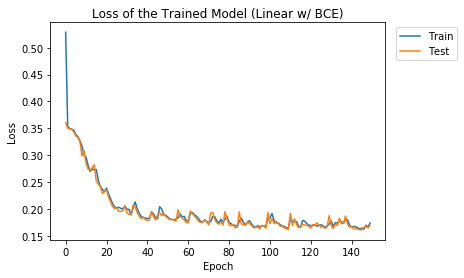

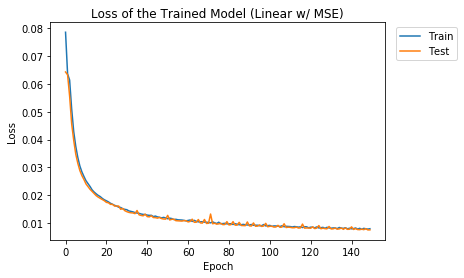

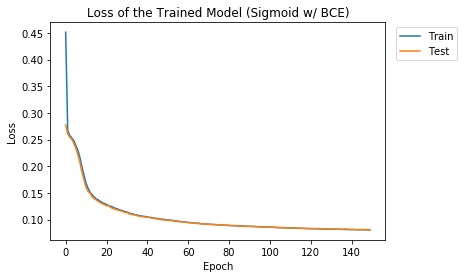

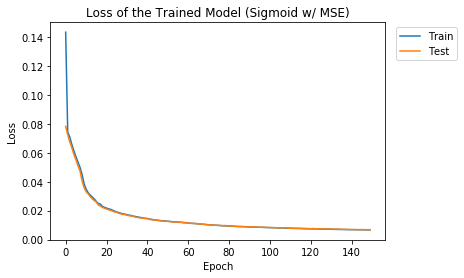

In [11]:
# Plot loss vs epoch for bonus question [Compare pairs of the output layer activation and loss function]
#   - Activation Function: Linear, Sigmoid
#   - Loss Functions: Binary Cross Entropy (BCE), Mean Squared Error (MSE)

plt.figure()
plt.plot(meta_data_1.history['loss'])
plt.plot(meta_data_1.history['val_loss'])
plt.title('Loss of the Trained Model (Linear w/ BCE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

plt.figure()
plt.plot(meta_data_2.history['loss'])
plt.plot(meta_data_2.history['val_loss'])
plt.title('Loss of the Trained Model (Linear w/ MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

plt.figure()
plt.plot(meta_data_3.history['loss'])
plt.plot(meta_data_3.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ BCE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

plt.figure()
plt.plot(meta_data_4.history['loss'])
plt.plot(meta_data_4.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [ ]:
def plot_images_part1(input, hidden, output, column):
    '''
    Show first ten samples in the testing set
    Show corresponding images of 'bottleneck' layer representation
    Show corresonding reconstructed images
    '''
  
    row = 10
    hidden = hidden.reshape((input.shape[0], 10, -1))

    fig = plt.figure(figsize=(13, 11))
    
    for i in range(row):
        for j in range(column):
            id = i * column + j + 1
            
            # Input Image
            if j == 0:
                ax = plt.subplot(row, column, id)
                plt.imshow(input[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Input Image')

            # Bootleneck Layer Representation
            if j == 1:
                ax = plt.subplot(row, column, id)
                plt.imshow(hidden[i])
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Bottleneck Layer Representation')

            # Reconstructed Image
            if j == 2:
                ax = plt.subplot(row, column, id)
                plt.imshow(output[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Reconstructed Image')
    
    plt.show()

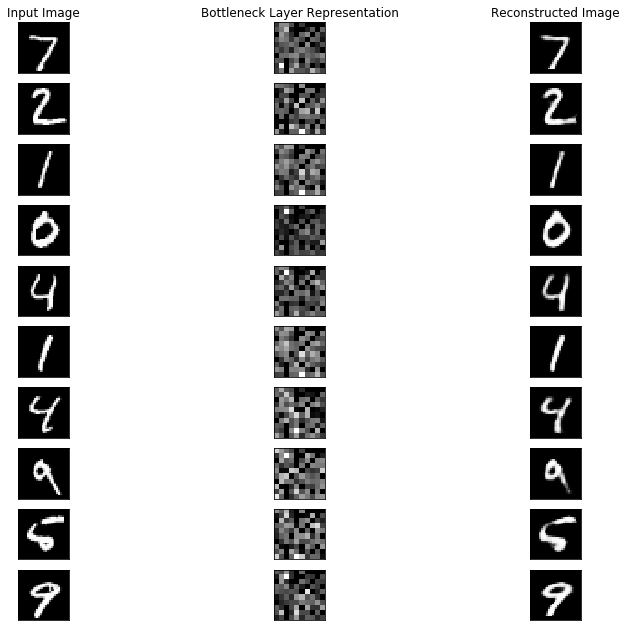

In [ ]:
# Show samples of 10 images, their hidden layer representations, and their reconstructions
'''
Loss Function: Mean Squared Error
'''

plot_images_part1(data_test, deep_ae_hl_MSE, reconstruct_MSE, 3)

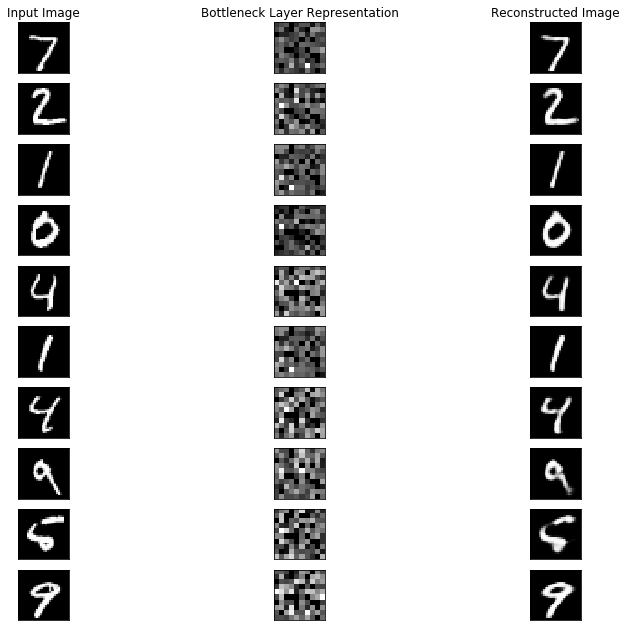

In [ ]:
# Show samples of 10 images, their hidden layer representations, and their reconstructions
'''
Loss Function: Binary Cross Entropy
'''

plot_images_part1(data_test, deep_ae_hl_BCE, reconstruct_BCE, 3)

Answer the following questions: 


1.  Question 2c: BONUS [reasoning question]: Pair the output layer activation and loss function which performs better together. Linear, sigmoid, Binary cross entropy and Mean Square error
 
  ANS: Using 'sigmoid' as activation function with 'Mean Squared Error' as loss function performs better than any other pairs. 

  ---
  'val_loss' Comparison  
  \- Linear  w/ BCE: 0.2027  
  \- Linear  w/ MSE: 0.0076  
  \- Sigmoid w/ BCE: 0.0808  
  \- Sigmoid w/ MSE: 0.0067   
  
  ---
  
  The main reason for this performance is due to the effective probability space (0 to 1) of the 'sigmoid' activation function's output and non-binary classification purpose (or say regression task of image reconstruction for computing pixel difference) for using 'Mean Squared Error' as the loss function.

2.  Question 5: Which loss function is better and why?

  ANS: Using 'Mean Squared Error' as the loss function performs better. Because 'Binary Cross Entropy' aims for binary classification purposes, however, this is not this project's purpose (again, image reconstruction belongs to regression task due to the computation of pixel difference).

3.  Question 6: If we were to predict pixels values [0 to 255] directly at the output of last layer. Should there be an activation function in last later?  If yes, which activation function and why?,  If No, reason why?

  ANS: Yes, and I use 'sigmoid' as the output activation function. The reason why is that we need the outputs to be between [0, 1] since the input is also in the same range, and 'sigmoid' supports our needs. Otherwise, computing the mean squared error might induce serious problems.

# Part 2: Deep Convolutional AutoEncoder

In [ ]:
# Reshape data into 2-D signals and account for grayscale channel in each image
data_train = data_train.reshape((data_train.shape[0], 28, -1, 1))
data_test  = data_test.reshape( (data_test.shape[0],  28, -1, 1))

In [ ]:
# Create Convolutional AutoEncoder Architecture
def cae():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='he_normal', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(8,  (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(8,  (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(16, (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='he_normal'))
    model.add(UpSampling2D(size=(2, 2)))
    
    model.add(Conv2D(1,  (3, 3), use_bias=True, activation='sigmoid', padding='same'))

    return model

In [ ]:
# Create deep autoencoder graph
conv_ae = cae()

# Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and assign training meta-data to a variable
meta_data_conv_MSE = conv_ae.fit(
                         data_train, data_train, 
                         validation_data=(data_test, data_test),
                         epochs=150, batch_size=2048, shuffle=True
                     )

# Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstruct_conv_MSE = conv_ae.predict(data_test)

# Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl_MSE = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 47us/step - loss: 0.1905 - val_loss: 0.1300
Epoch 2/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0953 - val_loss: 0.0641
Epoch 3/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0478 - val_loss: 0.0378
Epoch 4/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0345 - val_loss: 0.0308
Epoch 5/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0290 - val_loss: 0.0265
Epoch 6/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0254 - val_loss: 0.0234
Epoch 7/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0225 - val_loss: 0.0208
Epoch 8/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0200 - val_loss: 0.0185
Epoch 9/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0180 - val_loss: 0.0

In [ ]:
# Create deep autoencoder graph
conv_ae = cae()

# Compile model using an appropriate loss and optimizer algorithm
conv_ae.compile(loss='binary_crossentropy', optimizer='adam')

# Train the model and assign training meta-data to a variable
meta_data_conv_BCE = conv_ae.fit(
                         data_train, data_train, 
                         validation_data=(data_test, data_test),
                         epochs=150, batch_size=2048, shuffle=True
                     )

# Calculate the reconstructions of the testing set (output of autoencoder on test set)
reconstruct_conv_BCE = conv_ae.predict(data_test)

# Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])  # The fourth hidden layer are indexed at 3
conv_ae_hl_BCE = get_hl([data_test])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 46us/step - loss: 0.7238 - val_loss: 0.5907
Epoch 2/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.4942 - val_loss: 0.3629
Epoch 3/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.2852 - val_loss: 0.2215
Epoch 4/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1883 - val_loss: 0.1619
Epoch 5/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1526 - val_loss: 0.1436
Epoch 6/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1396 - val_loss: 0.1335
Epoch 7/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1307 - val_loss: 0.1255
Epoch 8/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1236 - val_loss: 0.1192
Epoch 9/150
60000/60000 [==============================] - 3s 43us/step - loss: 0.1179 - val_loss: 0.1

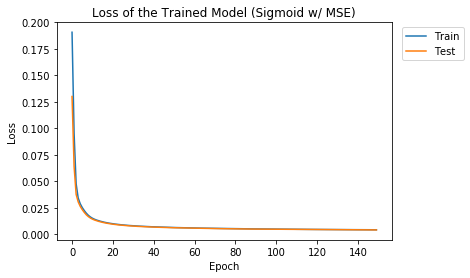

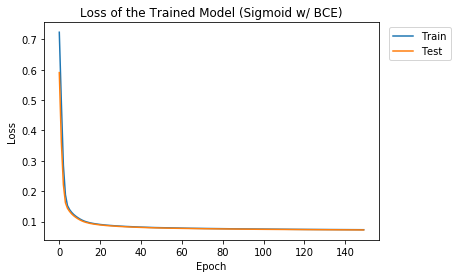

In [ ]:
# Plot loss vs epoch for BCE and MSE [Together or separate, Both accepted]

plt.figure()
plt.plot(meta_data_conv_MSE.history['loss'])
plt.plot(meta_data_conv_MSE.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

plt.figure()
plt.plot(meta_data_conv_BCE.history['loss'])
plt.plot(meta_data_conv_BCE.history['val_loss'])
plt.title('Loss of the Trained Model (Sigmoid w/ BCE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [ ]:
def plot_images_part2(input, hidden, output, column):
    '''
    Show first ten samples in the testing set
    Show corresponding images of 'bottleneck' layer representation
    Show corresonding reconstructed images
    '''
  
    row = 10
    hidden = hidden.reshape((input.shape[0], 28, 14))

    fig = plt.figure(figsize=(13, 11))
    
    for i in range(row):
        for j in range(column):
            id = i * column + j + 1
            
            # Input Image
            if j == 0:
                ax = plt.subplot(row, column, id)
                plt.imshow(input[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Input Image')

            # Bootleneck Layer Representation
            if j == 1:
                ax = plt.subplot(row, column, id)
                plt.imshow(hidden[i])
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Bottleneck Layer Representation')

            # Reconstructed Image
            if j == 2:
                ax = plt.subplot(row, column, id)
                plt.imshow(output[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Reconstructed Image')
    
    plt.show()

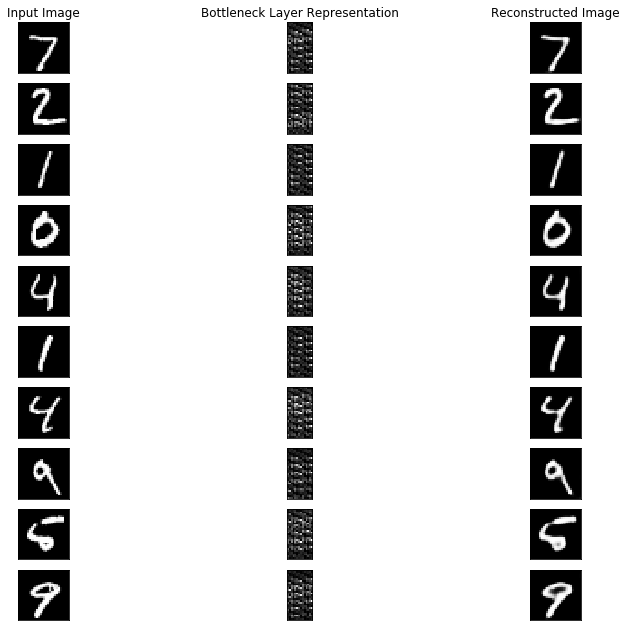

In [ ]:
# Show samples of 10 images, their hidden layer representations, and their reconstructions
'''
Loss Function: Mean Squared Error
'''

plot_images_part2(data_test, conv_ae_hl_MSE, reconstruct_conv_MSE, 3)

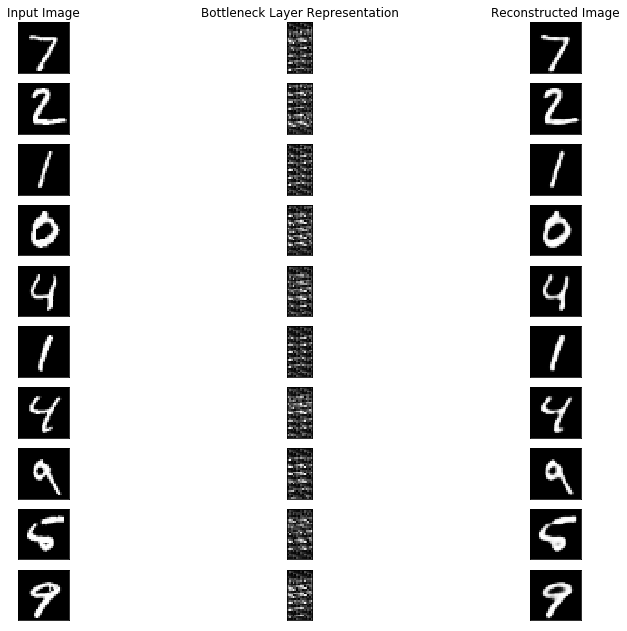

In [ ]:
# Show samples of 10 images, their hidden layer representations, and their reconstructions
'''
Loss Function: Binary Cross Entropy
'''

plot_images_part2(data_test, conv_ae_hl_BCE, reconstruct_conv_BCE, 3)

Answer the following questions: 


1.  Question 4: Which loss function is better and why?

  ANS: Using 'Mean Squared Error' as the loss function performs better. Because 'Binary Cross Entropy' aims for binary classification purposes, however, this is not this project's purpose (again, image reconstruction belongs to regression task due to the computation of pixel difference).

# Part 3: Denoising AutoEncoder

In [ ]:
data_train = data_train.reshape((data_train.shape[0], 28, -1, 1))
data_test  = data_test.reshape( (data_test.shape[0],  28, -1, 1))

# Inject noise into testing data
noise_factor     = 0.25
data_train_noisy = data_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_train.shape)
data_test_noisy  = data_test  + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=data_test.shape)

# Clip to stay within valid (normalized) pixel range
data_train_noisy = np.clip(data_train_noisy, 0., 1.)
data_test_noisy  = np.clip(data_test_noisy,  0., 1.)

# Reshape data to comply with input of denoising autoencoder
data_train_noisy = data_train_noisy.reshape(data_train.shape)
data_test_noisy  = data_test_noisy.reshape(  data_test.shape)

In [ ]:
def plot_images_part3(input, noisy, column):
    '''
    Show first ten samples in the testing set
    Show corresponding images of 'bottleneck' layer representation
    Show corresonding reconstructed images
    '''
  
    row = 10

    fig = plt.figure(figsize=(10, 11))
    
    for i in range(row):
        for j in range(column):
            id = i * column + j + 1
            
            # Input Image
            if j == 0:
                ax = plt.subplot(row, column, id)
                plt.imshow(input[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Input Image')

            # Noisy Image
            if j == 1:
                ax = plt.subplot(row, column, id)
                plt.imshow(noisy[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Noisy Image')
    
    plt.show()

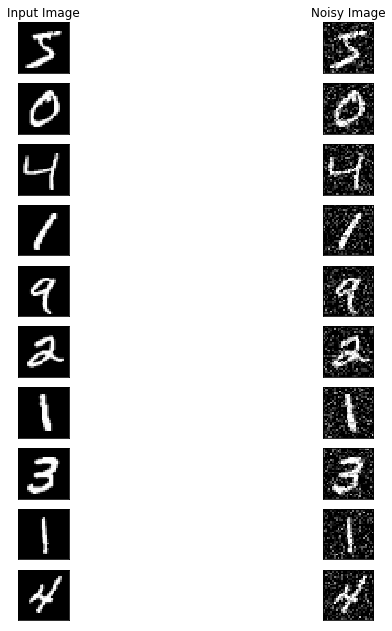

In [ ]:
# Show samples of 10 original images and their corrsponding noisy counterparts from the training set
plot_images_part3(data_train, data_train_noisy, 2)

In [ ]:
# Create denoising autoencoder architecture
def dae():
    model = Sequential()

    model.add(Conv2D(16, (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(8,  (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='uniform'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(8,  (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))
    model.add(Conv2D(16, (3, 3), use_bias=True, activation='relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))
    
    model.add(Conv2D(1,  (3, 3), use_bias=True, activation='relu', padding='same'))

    return model


# Compile and train the DAE
conv_dae = dae()

# Compile model using an appropriate loss and optimizer algorithm
conv_dae.compile(loss='mean_squared_error', optimizer='adam')

# Train the model and assign training meta-data to a variable
meta_data_conv_dae = conv_dae.fit(
                         data_train_noisy, data_train, 
                         validation_data=(data_test_noisy, data_test),
                         epochs=150, batch_size=2048, shuffle=True
                     )

# Generate denoised versions of noisy inputs
reconstruct_conv_dae = conv_dae.predict(data_test_noisy)

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 3s 48us/step - loss: 0.0892 - val_loss: 0.0746
Epoch 2/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0593 - val_loss: 0.0430
Epoch 3/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0356 - val_loss: 0.0298
Epoch 4/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0265 - val_loss: 0.0229
Epoch 5/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0210 - val_loss: 0.0185
Epoch 6/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0174 - val_loss: 0.0158
Epoch 7/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0153 - val_loss: 0.0142
Epoch 8/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0140 - val_loss: 0.0132
Epoch 9/150
60000/60000 [==============================] - 3s 42us/step - loss: 0.0132 - val_loss: 0.0

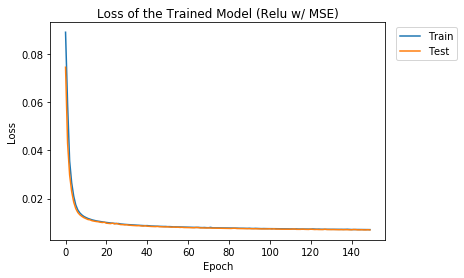

In [ ]:
# Plot loss vs epoch

plt.figure()
plt.plot(meta_data_conv_dae.history['loss'])
plt.plot(meta_data_conv_dae.history['val_loss'])
plt.title('Loss of the Trained Model (Relu w/ MSE)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], bbox_to_anchor=(1.23, 1), loc='upper right')
plt.show()

In [ ]:
def plot_images_part3(input, noisy, output, column):
    '''
    Show first ten samples in the testing set
    Show corresponding images of 'bottleneck' layer representation
    Show corresonding reconstructed images
    '''
  
    row = 10

    fig = plt.figure(figsize=(13, 11))
    
    for i in range(row):
        for j in range(column):
            id = i * column + j + 1
            
            # Input Image
            if j == 0:
                ax = plt.subplot(row, column, id)
                plt.imshow(input[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Input Image')

            # Noisy Image
            if j == 1:
                ax = plt.subplot(row, column, id)
                plt.imshow(noisy[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Noisy Image')

            # Denoising Image
            if j == 2:
                ax = plt.subplot(row, column, id)
                plt.imshow(output[i].reshape(28, 28))
                plt.gray()
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                if i == 0: plt.title('Denoising Image')
    
    plt.show()

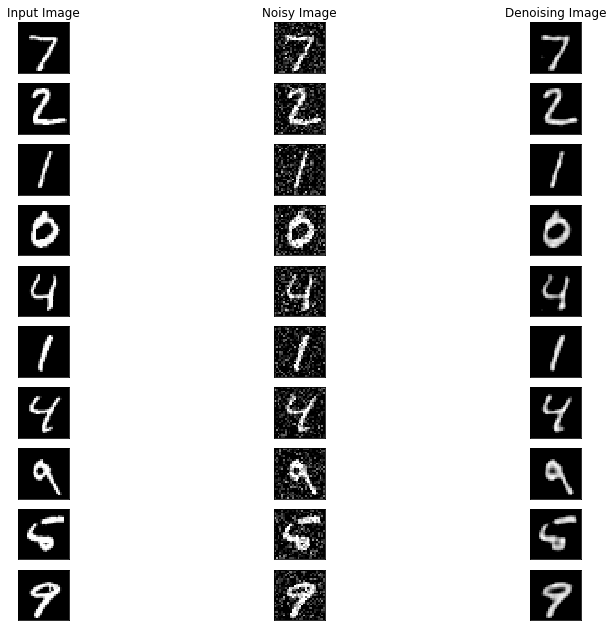

In [ ]:
# Show samples of 10 original images, their noisy counterparts, and their de-noised images from the testing set

plot_images_part3(data_test, data_test_noisy, reconstruct_conv_dae, 3)